### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-29,398454,3937868,604474,515985,232803,128390,127542,132314,111230,90883,80829,105934,84127,4847,191899
2021-06-30,399459,3947020,604714,518066,233047,128404,127566,132973,111244,90945,80875,106544,84264,4847,192331
2021-07-01,400312,3955679,605019,520095,233248,128426,127587,133633,111273,91014,80883,107137,84389,4847,192687
2021-07-02,401050,3963877,605413,521952,233428,128453,127615,134302,111297,91032,80911,107723,84516,4847,192687
2021-07-03,402005,3970719,605493,523587,233580,128471,127637,134987,111314,91040,80911,108314,84627,4847,192687


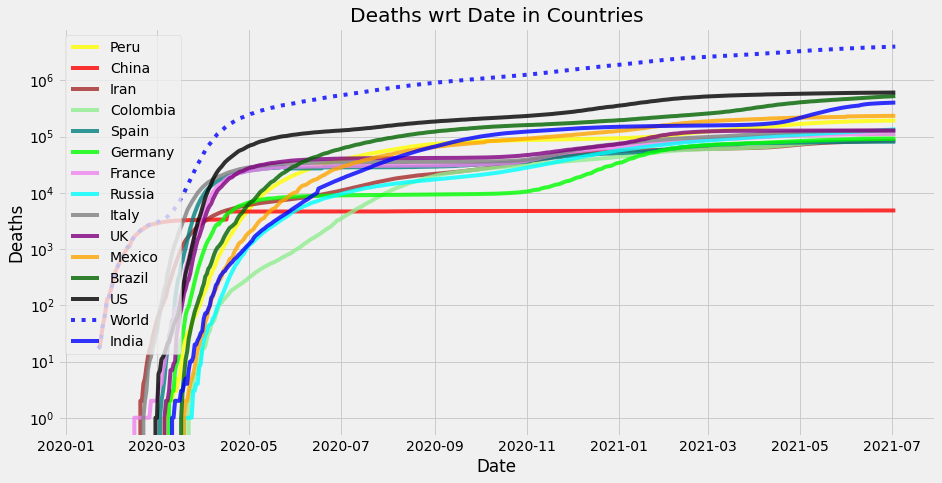

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-29,45951,384746,11596,64903,5711,20261,677,20217,3395,569,7091,25880,12717,10,0
2021-06-30,48786,391839,12872,43836,6105,25670,776,20633,1380,806,9227,27908,11748,14,3950
2021-07-01,46617,439021,14463,65163,6081,27646,879,23128,2664,754,12345,28315,14303,22,5489
2021-07-02,44111,442947,29698,65165,5842,26863,794,22791,2687,671,12563,28005,13836,34,0
2021-07-03,43071,375056,4739,54556,6265,24465,929,24003,3006,429,0,26928,8341,16,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-29,86390,400190,14532,65510,3455,11239,1758,15521,2698,2061,4347,27268,10394,23,3152
2021-06-30,83883,399633,14422,64065,3632,12201,1693,15861,2610,1977,4672,27311,10484,22,3205
2021-07-01,81398,402259,14424,64138,3795,13231,1638,16346,2613,1895,5184,27378,10739,22,3357
2021-07-02,78912,404972,15443,64206,3932,14139,1582,16775,2618,1814,5676,27419,10945,23,3133
2021-07-03,76523,402977,14729,63563,4087,14828,1539,17257,2644,1721,5297,27387,10772,22,2924


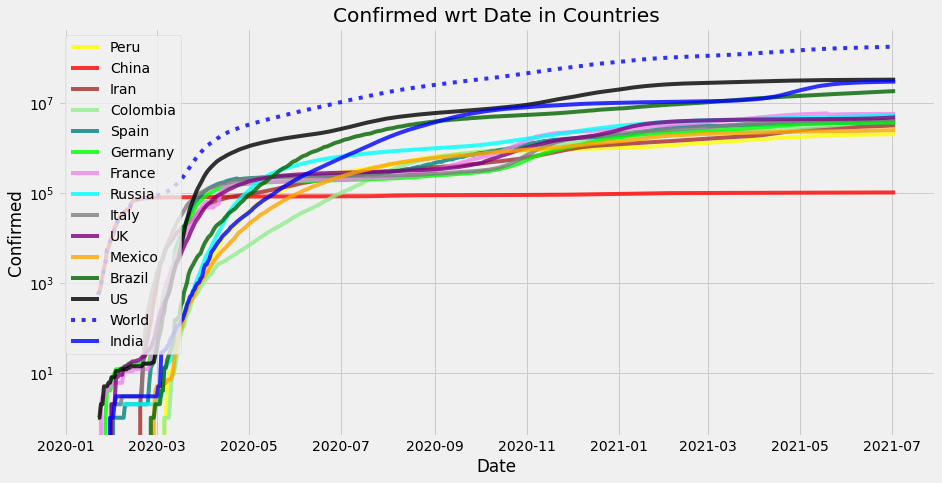

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-29,817,8129,331,1893,195,23,42,643,56,57,40,608,142,1,0
2021-06-30,1005,9152,240,2081,244,14,24,659,14,62,46,610,137,0,432
2021-07-01,853,8659,305,2029,201,22,21,660,29,69,8,593,125,0,356
2021-07-02,738,8198,394,1857,180,27,28,669,24,18,28,586,127,0,0
2021-07-03,955,6842,80,1635,152,18,22,685,17,8,0,591,111,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-06-29,1518.56,8286.30,282.07,1647.77,179.11,14.48,37.16,529.26,42.10,58.26,20.65,634.49,132.91,0.11,202.90
2021-06-30,1454.36,8394.51,276.81,1701.92,187.23,14.42,35.51,545.48,38.59,58.73,23.82,631.43,133.42,0.10,231.53
2021-07-01,1379.19,8427.57,280.33,1742.81,188.95,15.37,33.70,559.80,37.39,60.01,21.84,626.63,132.37,0.09,247.09
2021-07-02,1299.04,8398.88,294.54,1757.08,187.83,16.82,32.99,573.45,35.72,54.76,22.61,621.55,131.70,0.08,216.21
2021-07-03,1256.04,8204.27,267.72,1741.82,183.35,16.97,31.61,587.39,33.38,48.92,19.78,617.73,129.11,0.07,189.18


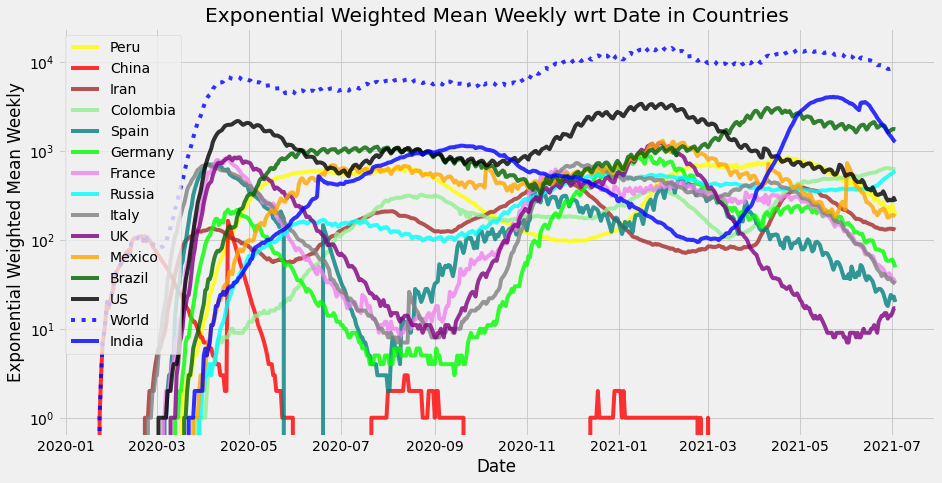

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

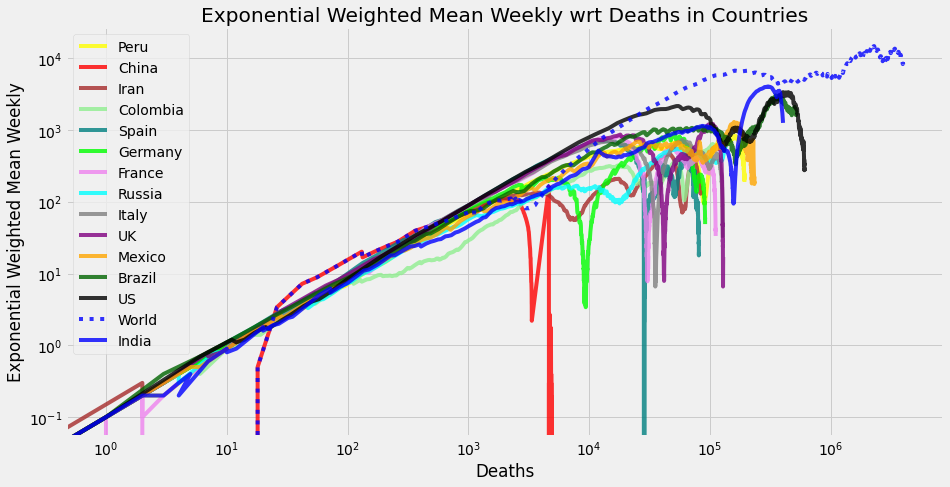

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

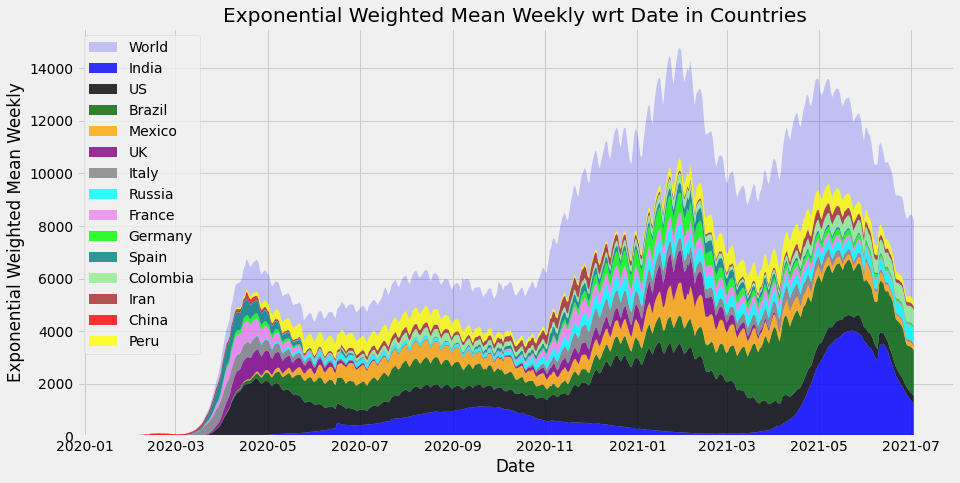

In [20]:
stackplotter(AVG, name)

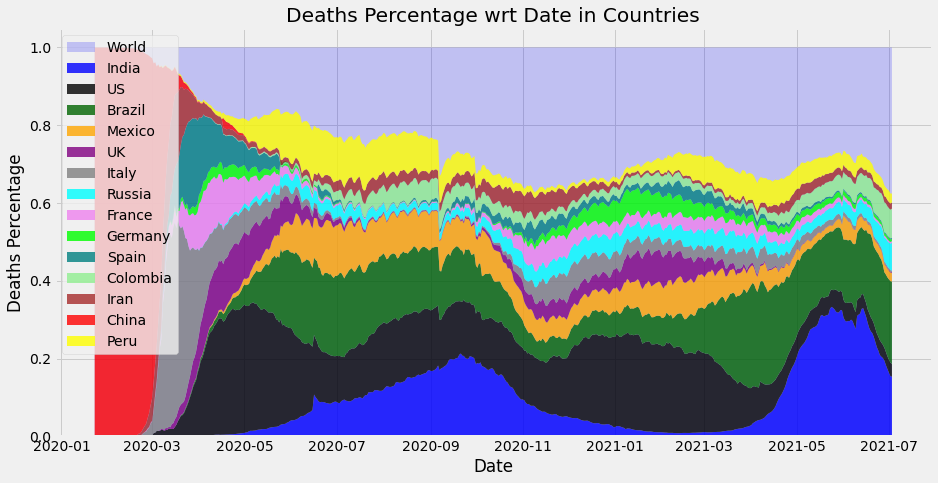

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

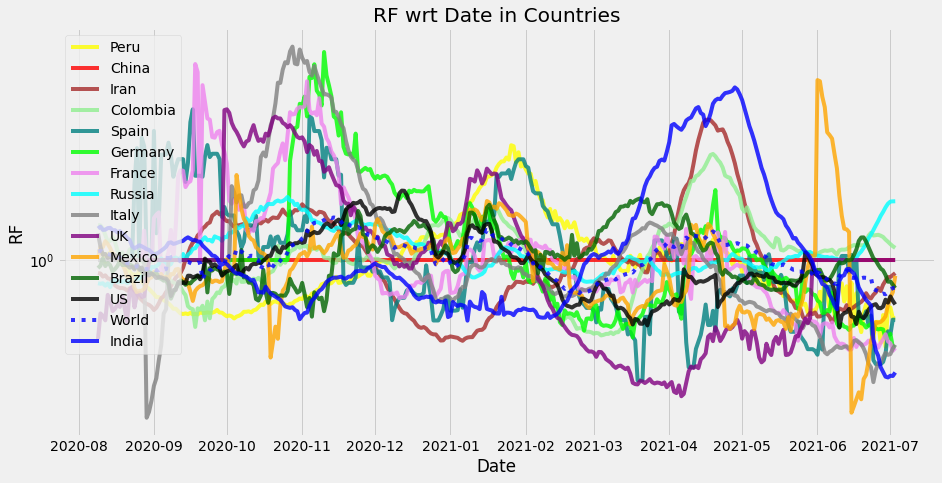

In [23]:
plotter(Reproductivity[200:], 'RF')

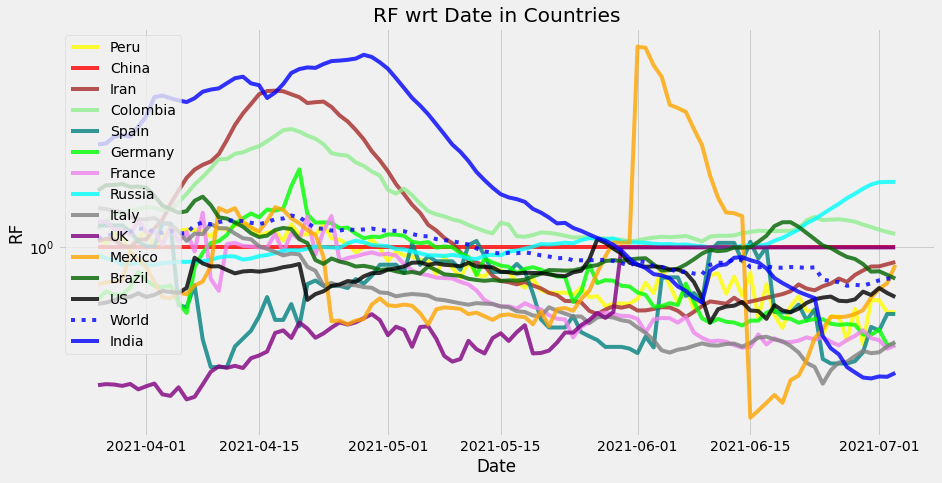

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

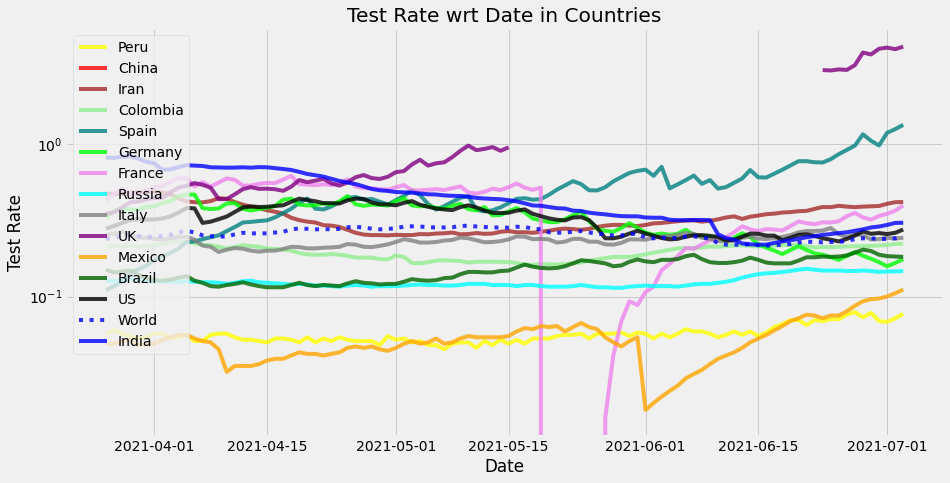

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

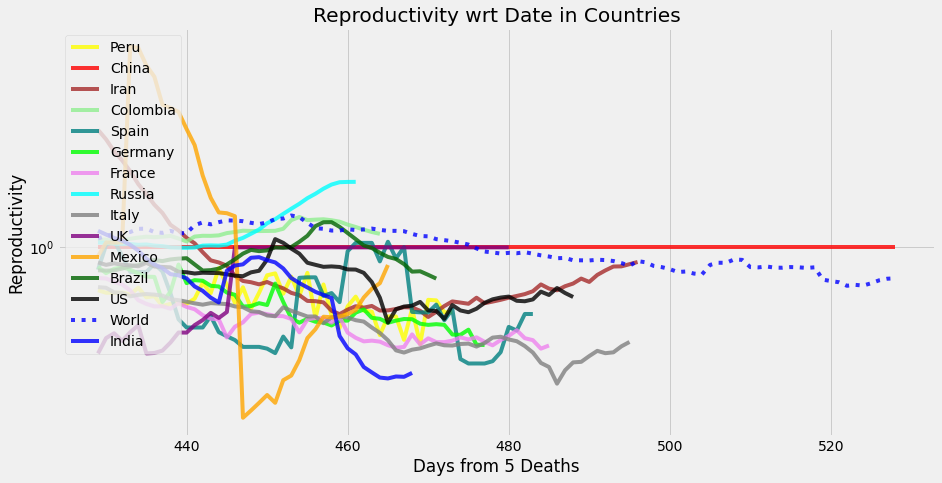

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

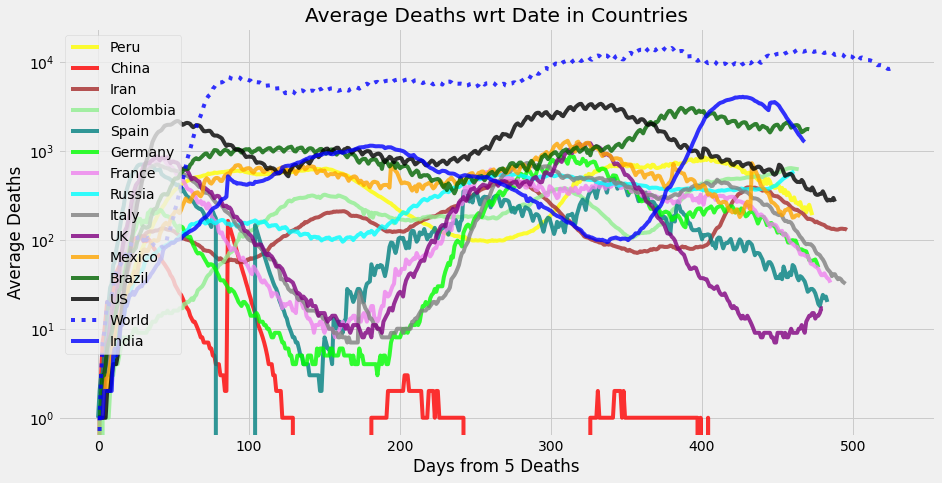

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

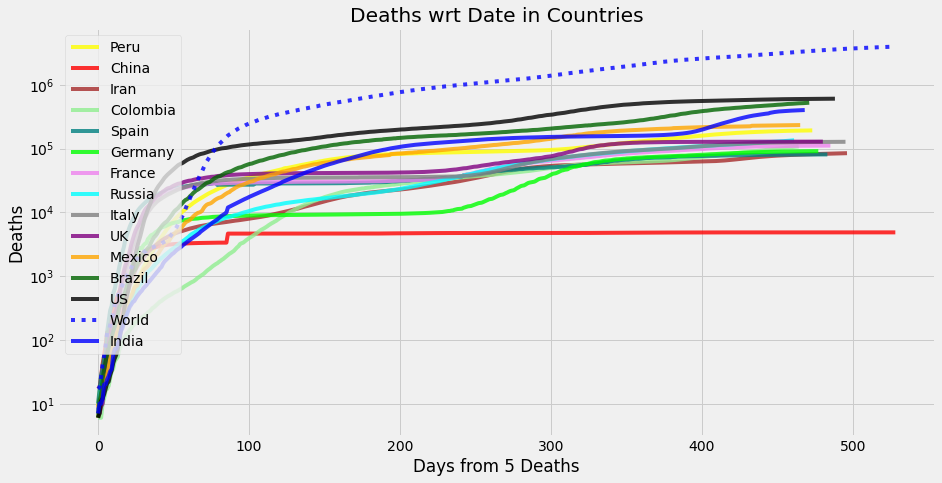

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3970719,6842,7653.29,8204.27,0.8306,183459394,0.246,402977,794.14
US,605493,80,224.86,267.72,0.7427,33713870,0.275,14729,121.10
Brazil,523587,1635,1550.29,1741.82,0.8293,18742025,0.182,63563,104.72
India,402005,955,893.43,1256.04,0.4709,30545433,0.305,76523,80.40
Mexico,233580,152,151.29,183.35,0.8998,2537457,0.111,4087,46.72
Peru,192687,0,177.14,189.18,0.6777,2057554,0.077,2924,38.54
Russia,134987,685,644.00,587.39,1.4821,5519516,0.147,17257,27.00
UK,128471,18,16.86,16.97,1.0000,4896272,4.369,14828,25.69
Italy,127637,22,25.57,31.61,0.5670,4262511,0.243,1539,25.53


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3970719,6842,7653.29,8204.27,0.8306,183459394,0.246,402977,794.14
Brazil,523587,1635,1550.29,1741.82,0.8293,18742025,0.182,63563,104.72
India,402005,955,893.43,1256.04,0.4709,30545433,0.305,76523,80.40
Russia,134987,685,644.00,587.39,1.4821,5519516,0.147,17257,27.00
Colombia,108314,591,614.29,617.73,1.0848,4324230,0.222,27387,21.66
Indonesia,60027,493,471.14,408.62,1.9393,2256851,0.198,16148,12.01
Argentina,95594,212,468.14,484.81,0.8956,4526473,0.221,21409,19.12
South Africa,61507,175,247.00,215.59,1.8092,2046311,0.320,13777,12.30
US,605493,80,224.86,267.72,0.7427,33713870,0.275,14729,121.10


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3970719


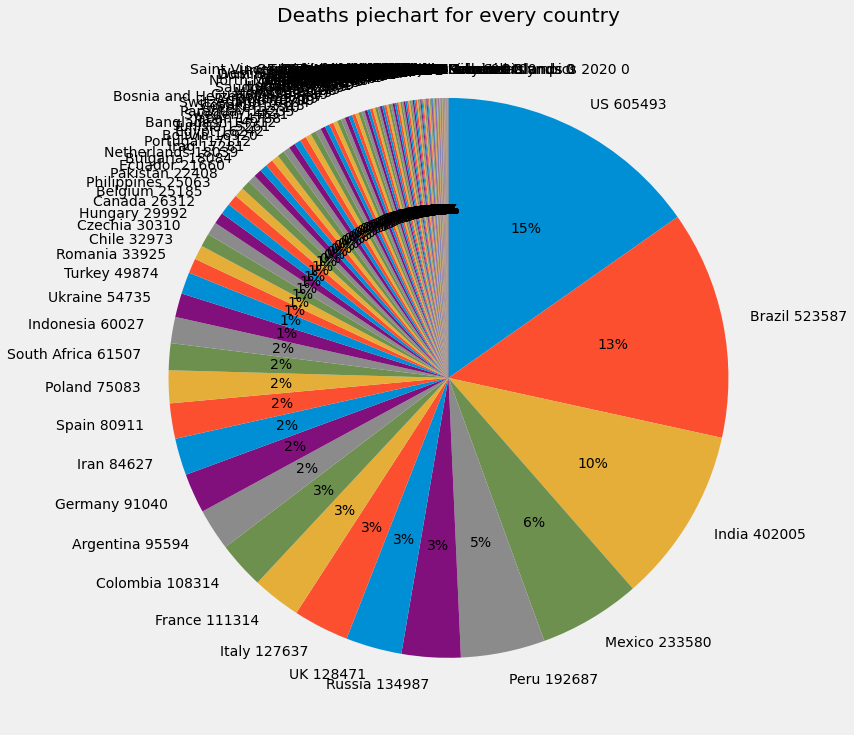

In [35]:
piechart('Deaths')

World total:  7653


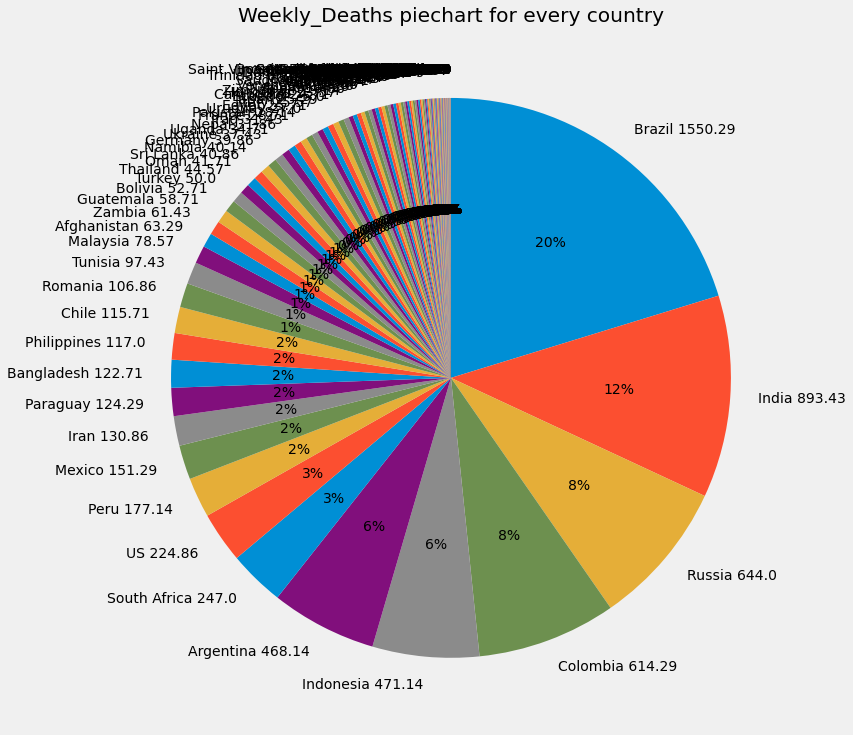

In [36]:
piechart('Weekly_Deaths')

World total:  6842


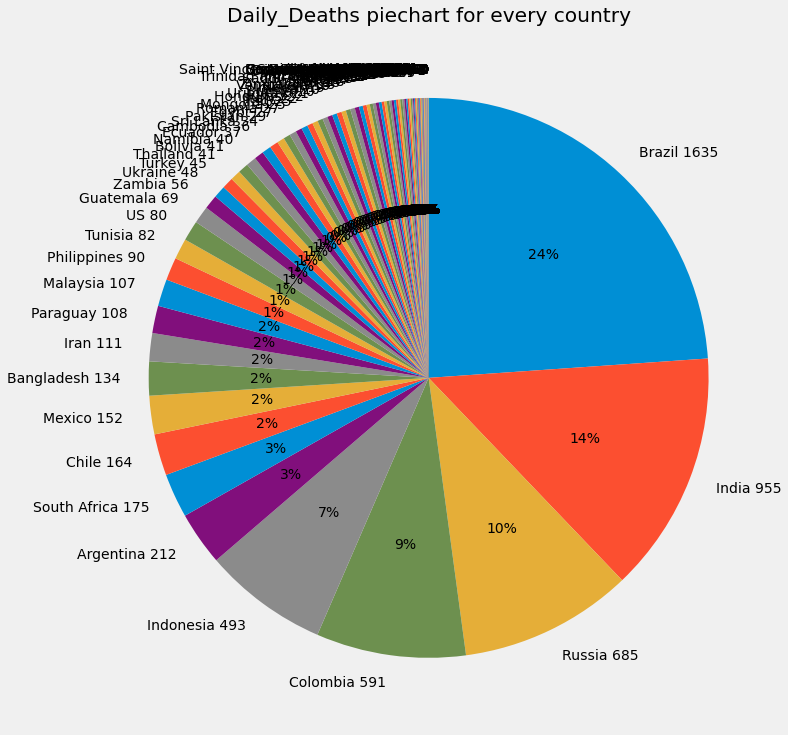

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-04


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

794143800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 8932ee8] `date` update
 1 file changed, 2125 insertions(+), 2124 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (67%)


To https://github.com/Arrowheadahp/COVID-19.git
   49b17f2..8932ee8  master -> master
